# Visual Analytics & Report Building

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1iuhrtVJIhJ4xPlrNmUL570gBUoozB3YJ/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1iuhrtVJIhJ4xPlrNmUL570gBUoozB3YJ
To: /content/NYPD_cleaned_data.csv
100% 11.2M/11.2M [00:00<00:00, 98.0MB/s]


In [4]:
# import necessary libraries
%matplotlib inline

import gc
import pandas as  pd

import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import numpy as np

In [5]:
clpd_test = pd.read_csv('dataset/NYPD_cleaned_data.csv')

In [9]:
# Skewness
sns.set_style("darkgrid")

numerical_columns = clpd_test.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(clpd_test[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(clpd_test[feature].skew(), 2)}")

plt.tight_layout()
plt.savefig("Skewness.png")



# Fraud Victims (Age_Group)

In [12]:
fraud_crimes = clpd_test[clpd_test.OFNS_DESC.
 str.contains('OFFENSES INVOLVING FRAUD|THEFT-FRAUD|FRAUDULENT ACCOSTING|FORTUNE TELLING|FRAUDS|FORGERY')]
exclude = ["UNKOWN","UNKNOWN","D","L"]


filter_data = fraud_crimes[~fraud_crimes['VIC_AGE_GROUP'].isin(exclude)]
filter_data['VIC_AGE_GROUP'].value_counts().head().plot(
    kind="barh",
    color=  sns.color_palette('pink',n_colors =3),
    title='Top 3 Offense Types in Sex Crimes'
)

plt.title('Fraud Victims by Age', fontsize=16, fontweight="bold")
plt.xlabel('Number of Victims', fontsize=14, fontweight="bold")
plt.ylabel('Gender', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Fraud-Victims-by-Age.png")


# Victims of Violent Crimes

In [13]:
fraud_crimes = clpd_test[clpd_test.OFNS_DESC.
 str.contains('DANGEROUS WEAPONS|FELONY ASSAULT|ASSAULT 3 & RELATED OFFENSES|ARSON|MURDER & NON-NEGL. MANSLAUGHTER')]
exclude = ["UNKNOWN","D","L",'E']


filter_data = fraud_crimes[~fraud_crimes['VIC_SEX'].isin(exclude)]
filter_data['VIC_SEX'].value_counts().head().plot(
    kind="barh",
    color=  sns.color_palette('pink',n_colors =3),
    title='Top 3 Offense Types in Sex Crimes'
)

plt.title('Victims Of Violent Crimes', fontsize=16, fontweight="bold")
plt.xlabel('Number of Victims', fontsize=14, fontweight="bold")
plt.ylabel('Gender', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Victims-Of-Violent-Crimes.png")


In [ ]:
clpd_test.OFNS_DESC.unique()

array(['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
       'DANGEROUS WEAPONS', 'HARRASSMENT 2',
       'OFF. AGNST PUB ORD SENSBLTY &', 'SEX CRIMES', 'PETIT LARCENY',
       'MISCELLANEOUS PENAL LAW', 'GRAND LARCENY', 'THEFT-FRAUD',
       'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY', 'FELONY ASSAULT',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY', 'FORGERY', 'ROBBERY',
       'ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL TRESPASS',
       'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
       'GRAND LARCENY OF MOTOR VEHICLE', 'UNAUTHORIZED USE OF A VEHICLE',
       'GAMBLING', 'ARSON', 'UNKOWN', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES INVOLVING FRAUD', 'RAPE',
       'OTHER OFFENSES RELATED TO THEF', 'FRAUDULENT ACCOSTING',
       'ADMINISTRATIVE CODE', 'PETIT LARCENY OF MOTOR VEHICLE',
       'NYS LAWS-UNCLASSIFIED FELONY', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'OTHER STATE LAWS (NON PENAL LA', 'KIDNAPPING & RELATED OFFENSES',
       'PROSTITUTION & 

# Vehicle Crime Suspects

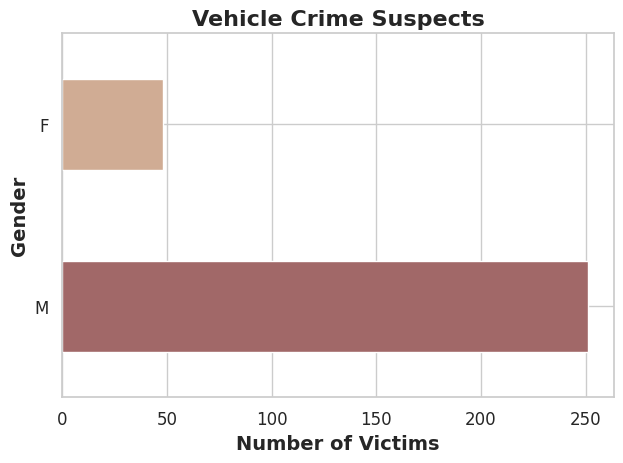

In [ ]:
fraud_crimes = clpd_test[clpd_test.OFNS_DESC.
 str.contains('VEHICLE AND TRAFFIC LAWS|HOMICIDE-NEGLIGENT-VEHICLE|UNAUTHORIZED USE OF A VEHICLE|GRAND LARCENY OF MOTOR VEHICLE')]
exclude = ["UNKOWN","D","L",'E','U']


filter_data = fraud_crimes[~fraud_crimes['SUSP_SEX'].isin(exclude)]
filter_data['SUSP_SEX'].value_counts().head().plot(
    kind="barh",
    color=  sns.color_palette('pink',n_colors =3),
    title='Top 3 Offense Types in Sex Crimes'
)

plt.title('Vehicle Crime Suspects', fontsize=16, fontweight="bold")
plt.xlabel('Number of Victims', fontsize=14, fontweight="bold")
plt.ylabel('Gender', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Vehicle-Crime-Suspectsn.png")


# Crime Victims (Age Group)

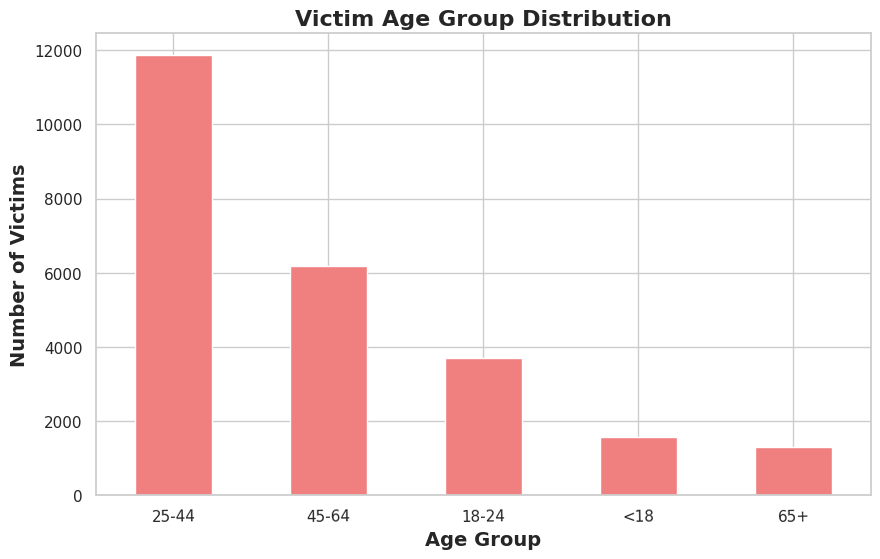

In [ ]:
# Victims Age Group
plt.figure(figsize=(10,6))

exclude = ['UNKOWN','UNKNOWN','(null)']
vic_age_group = clpd_test[~clpd_test['VIC_AGE_GROUP'].isin(exclude)]

vic_age_group['VIC_AGE_GROUP'].value_counts().head().plot(kind='bar', color='lightcoral')
plt.title('Victim Age Group Distribution', fontsize=16, fontweight="bold")
plt.xlabel('Age Group', fontsize=14, fontweight="bold")
plt.ylabel('Number of Victims', fontsize=14, fontweight="bold")
plt.xticks(rotation=1)
plt.savefig("Victim-Age-Group-Distribution.png")

# Top 5 Crimes in Each NYC Borough (NYPD Complaints Dataset)

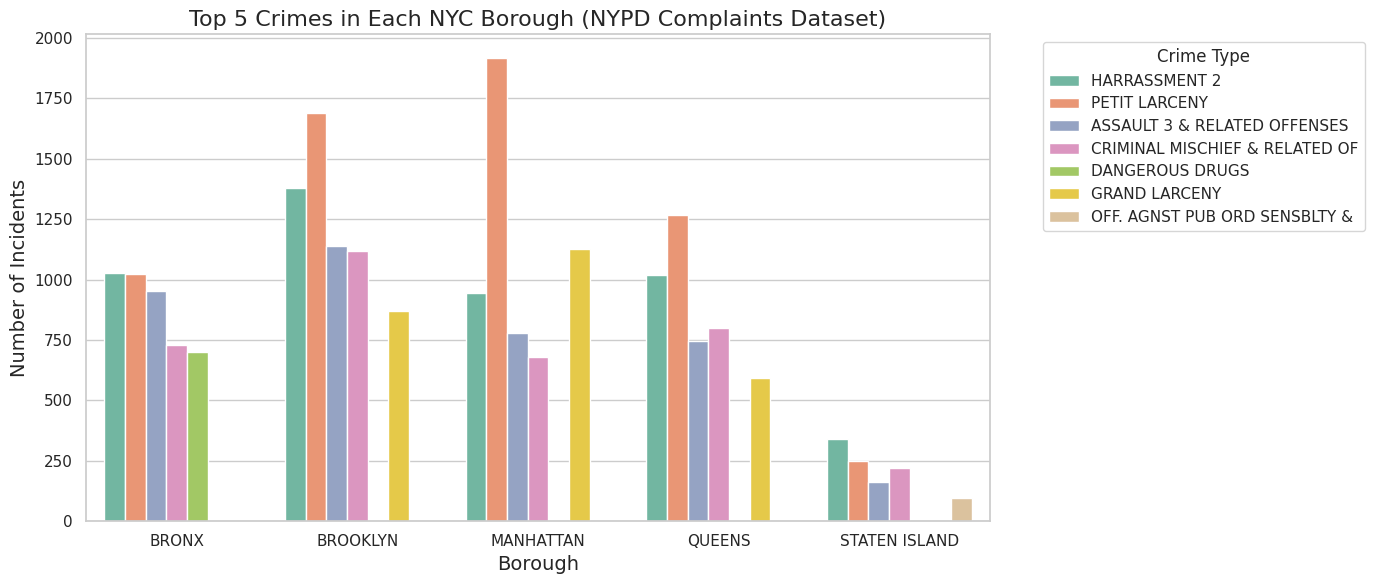

In [ ]:
#Top 5 Crimes in Each NYC Borough (NYPD Complaints Dataset

exclude = ["UNKNOWN","UNKOWN","D","L","(null)"]
df_clean = clpd_test[~clpd_test['BORO_NM'].isin(exclude)]


crime_by_boro = df_clean.groupby(['BORO_NM', 'OFNS_DESC']).size().reset_index(name='Count')
crime_by_boro_sorted = crime_by_boro.sort_values(['BORO_NM', 'Count'], ascending=[True, False])
top_crimes_per_boro = crime_by_boro_sorted.groupby('BORO_NM').head(5)


sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x='BORO_NM', y='Count', hue='OFNS_DESC', data=top_crimes_per_boro, palette='Set2')
plt.title('Top 5 Crimes in Each NYC Borough (NYPD Complaints Dataset)', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.savefig("Top_10__Crimes_in_Each-NYC-Borough.png")

# Top 10 Crime Types

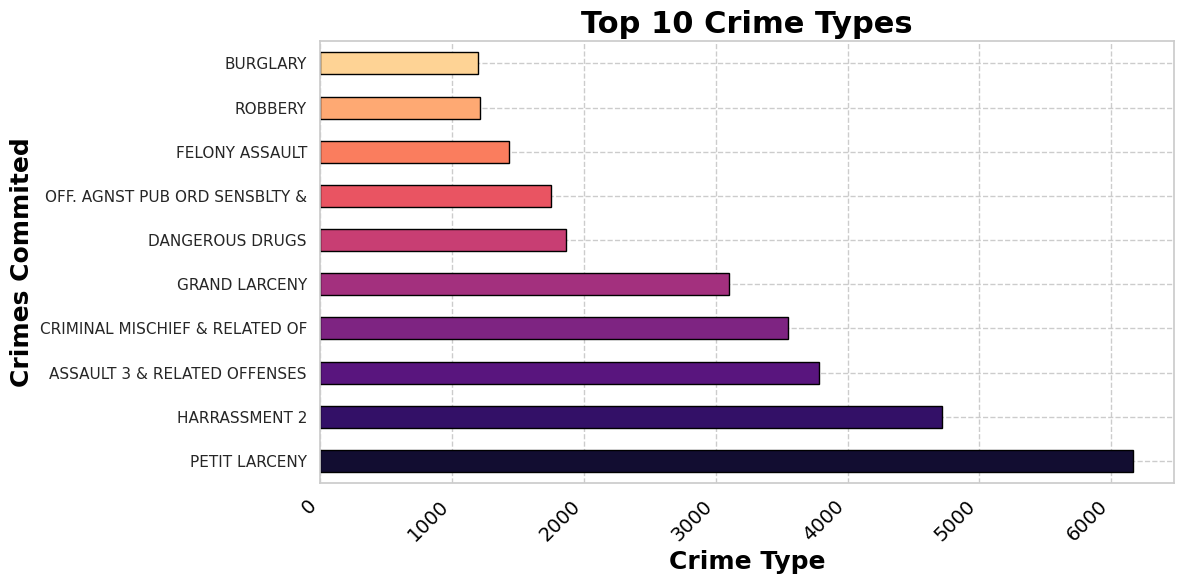

In [ ]:
#Top 10 Crime Types

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
ax = clpd_test['OFNS_DESC'].value_counts().iloc[:10].plot(
    kind='barh',
    color=sns.color_palette("magma", n_colors=10),
    edgecolor='black'
)

plt.title('Top 10 Crime Types', fontsize=22, fontweight='bold', color='black')
plt.ylabel('Crimes Commited', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Crime Type', fontsize=18, fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right', fontsize=14, color='black')
plt.grid(True,  linestyle='--')
plt.tight_layout()
plt.savefig("Top_10__Crime_Types.png")

# In addition to the descriptive analysis of the data, I plan to answer the following questions

# Question 1: Based on the sex of the victim which which crimes are most likely to occur



In [ ]:
null_rows = df_clean[df_clean[['VIC_SEX', 'OFNS_DESC']].isnull().any(axis=1)]
print(null_rows)


Empty DataFrame
Columns: [Unnamed: 0, CMPLNT_NUM, CMPLNT_FR_DT, CMPLNT_FR_TM, RPT_DT, OFNS_DESC, PD_DESC, CRM_ATPT_CPTD_CD, LAW_CAT_CD, BORO_NM, LOC_OF_OCCUR_DESC, PREM_TYP_DESC, JURIS_DESC, SUSP_AGE_GROUP, SUSP_RACE, SUSP_SEX, PATROL_BORO, VIC_AGE_GROUP, VIC_RACE, VIC_SEX, Month_Abbr, Year, ADDR_PCT_CD, KY_CD, PD_CD, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD, Latitude, Longitude, Hour, Time_Category]
Index: []

[0 rows x 32 columns]


In [ ]:
# Question : Based on the sex of the victim which which crimes are most likely to occur


q1_ = clpd_test[clpd_test['VIC_SEX'].isin(['F', 'M'])]

print(q1_[['VIC_SEX', 'OFNS_DESC']].isnull().sum())

# deprecated functions
#clpd_test['VIC_SEX'].fillna('UNKNOWN', inplace=True)
#clpd_test['OFNS_DESC'].fillna('UNKNOWN', inplace=True)

clpd_test.fillna({'VIC_SEX': 'UNKNOWN'}, inplace=True)
clpd_test.fillna({'OFNS_DESC': 'UNKNOWN'}, inplace=True)



crime_by_sex = q1_.groupby(['VIC_SEX', 'OFNS_DESC']).size().reset_index(name='Count')
crime_by_sex_sorted = crime_by_sex.sort_values(by='Count', ascending=False)


print("Top Crimes by Victim's Sex:")
print(crime_by_sex_sorted.head(10))


VIC_SEX      0
OFNS_DESC    0
dtype: int64
Top Crimes by Victim's Sex:
   VIC_SEX                       OFNS_DESC  Count
15       F                   HARRASSMENT 2   3045
3        F    ASSAULT 3 & RELATED OFFENSES   2095
71       M                   PETIT LARCENY   2035
40       M    ASSAULT 3 & RELATED OFFENSES   1673
55       M                   HARRASSMENT 2   1622
26       F                   PETIT LARCENY   1614
13       F                   GRAND LARCENY   1471
43       M  CRIMINAL MISCHIEF & RELATED OF   1278
21       F   OFF. AGNST PUB ORD SENSBLTY &   1208
53       M                   GRAND LARCENY   1178


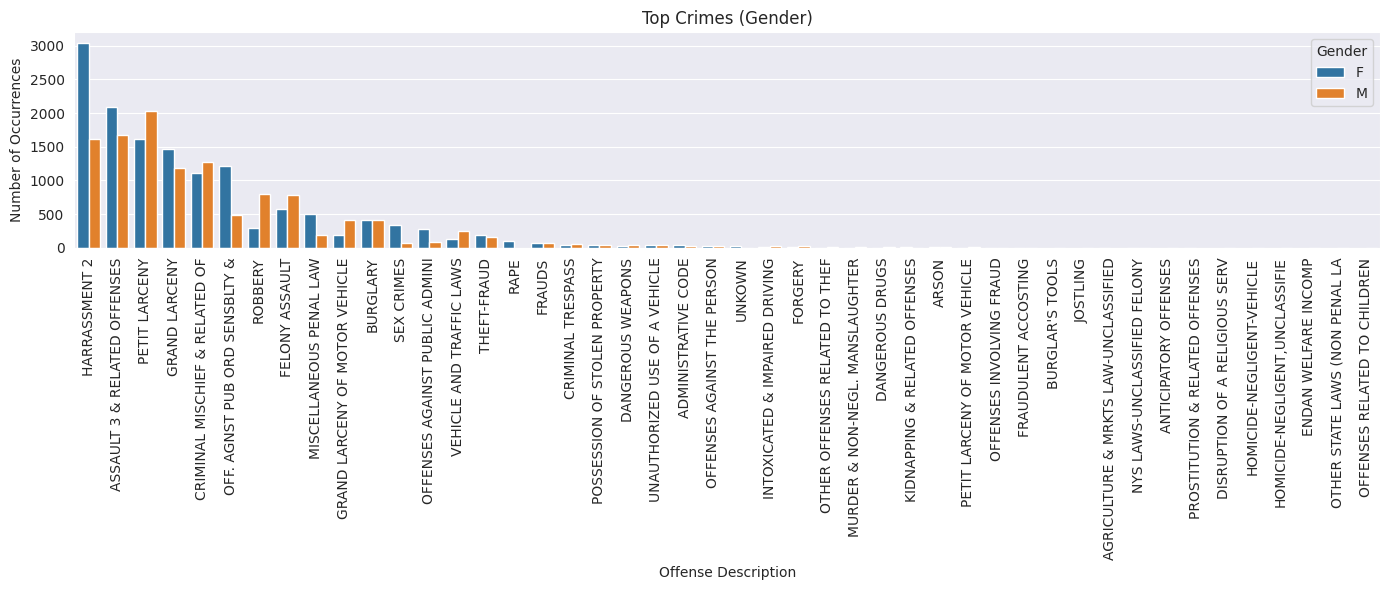

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

exclude = ["UNKNOWN","UNKOWN"]
df_clean = clpd_test[~clpd_test['BORO_NM'].isin(exclude)]


plt.figure(figsize=(14, 6))
sns.barplot(data=crime_by_sex_sorted, x='OFNS_DESC', y='Count', hue='VIC_SEX')
plt.xticks(rotation=90)
plt.title("Top Crimes (Gender)")
plt.xlabel("Offense Description")
plt.ylabel("Number of Occurrences")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("Top_Crimes_by_Victim's_Sex.png")


#Q2 Based on the longitude and latitude determine the boro where an incident was committed and the crimes committed there.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print(clpd_test[['CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM']].isnull().sum())
clpd_test.dropna(subset=['CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM'], inplace=True)
clpd_test['CMPLNT_FR_TM'] = pd.to_datetime(clpd_test['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')

def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


clpd_test['Hour'] = clpd_test['CMPLNT_FR_TM'].dt.hour
clpd_test['Time_Category'] = clpd_test['Hour'].apply(time_of_day)


print(clpd_test[['CMPLNT_FR_TM', 'Hour', 'Time_Category']].head())


CMPLNT_FR_TM    0
OFNS_DESC       0
BORO_NM         0
dtype: int64
         CMPLNT_FR_TM  Hour Time_Category
0 1900-01-01 21:40:00    21       Evening
1 1900-01-01 03:10:00     3         Night
2 1900-01-01 14:15:00    14     Afternoon
3 1900-01-01 16:45:00    16     Afternoon
4 1900-01-01 17:00:00    17     Afternoon


# Top Crimes by time of Day

In [ ]:
crime_by_time_boro = clpd_test.groupby(['BORO_NM', 'Time_Category', 'OFNS_DESC']).size().reset_index(name='Count')
crime_by_time_boro_sorted = crime_by_time_boro.sort_values(by='Count', ascending=False)


print("Top Crimes by Time of Day and Borough:")
print(crime_by_time_boro_sorted.head(20))


Top Crimes by Time of Day and Borough:
       BORO_NM Time_Category                       OFNS_DESC  Count
330  MANHATTAN     Afternoon                   PETIT LARCENY    878
173   BROOKLYN     Afternoon                   PETIT LARCENY    677
368  MANHATTAN       Evening                   PETIT LARCENY    497
479     QUEENS     Afternoon                   PETIT LARCENY    482
212   BROOKLYN       Evening                   PETIT LARCENY    477
161   BROOKLYN     Afternoon                   HARRASSMENT 2    465
313  MANHATTAN     Afternoon                   GRAND LARCENY    458
199   BROOKLYN       Evening                   HARRASSMENT 2    445
188   BROOKLYN       Evening  CRIMINAL MISCHIEF & RELATED OF    413
515     QUEENS       Evening                   PETIT LARCENY    400
185   BROOKLYN       Evening    ASSAULT 3 & RELATED OFFENSES    395
406  MANHATTAN       Morning                   PETIT LARCENY    395
26       BRONX     Afternoon                   PETIT LARCENY    380
249   BRO

# Time of Day of the Most Crime and the boroughs

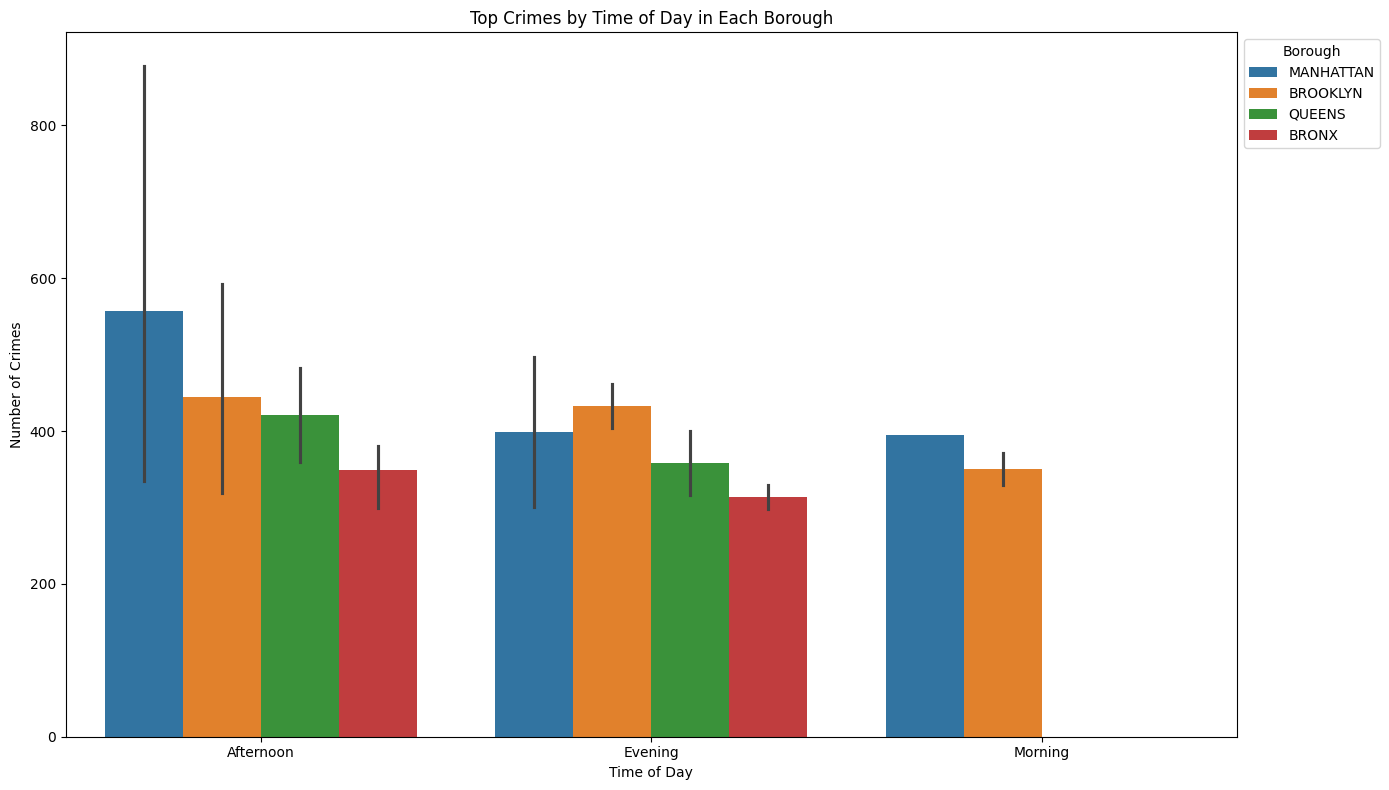

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=crime_by_time_boro_sorted.head(25), x='Time_Category', y='Count', hue='BORO_NM')


plt.title("Top Crimes by Time of Day in Each Borough")
plt.xlabel("Time of Day")
plt.ylabel("Number of Crimes")
plt.legend(title="Borough", bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.savefig("Top-Crimes-by-Time-of-Day-in-Each-Borough.jpg")

# occurence

In [ ]:
crimes_by_location = clpd_test.groupby(['LOC_OF_OCCUR_DESC','PREM_TYP_DESC', 'OFNS_DESC']).size().reset_index(name='Count')
crimes_by_location_sorted = crimes_by_location.sort_values(by='Count', ascending=False)
top_crimes_by_location = crimes_by_location_sorted.groupby('PREM_TYP_DESC').head(10)


top_crimes_by_location


,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,OFNS_DESC,Count
1060,INSIDE,RESIDENCE - APT. HOUSE,HARRASSMENT 2,1369
1049,INSIDE,RESIDENCE - APT. HOUSE,ASSAULT 3 & RELATED OFFENSES,1028
460,FRONT OF,STREET,PETIT LARCENY,906
434,FRONT OF,STREET,CRIMINAL MISCHIEF & RELATED OF,782
613,INSIDE,CHAIN STORE,PETIT LARCENY,685
...,...,...,...,...
35,FRONT OF,BRIDGE,DANGEROUS WEAPONS,1
53,FRONT OF,CEMETERY,CRIMINAL MISCHIEF & RELATED OF,1
52,FRONT OF,CEMETERY,ASSAULT 3 & RELATED OFFENSES,1
34,FRONT OF,BOOK/CARD,HARRASSMENT 2,1


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
top_crimes_by_location.groupby('LOC_OF_OCCUR_DESC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

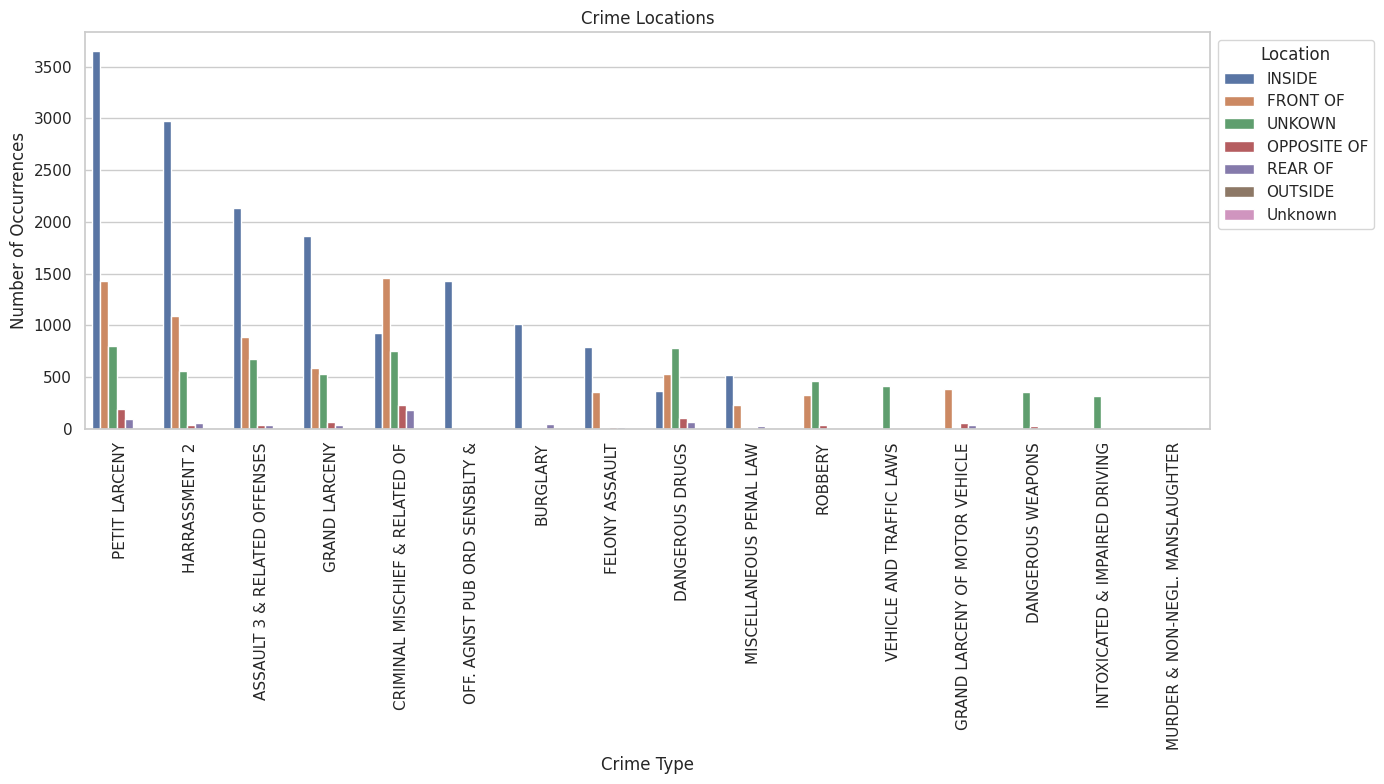

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_crimes_by_location, x='OFNS_DESC', y='Count', hue='LOC_OF_OCCUR_DESC', errorbar=None)


plt.xticks(rotation=90)
plt.title("Crime Locations")
plt.xlabel("Crime Type")
plt.ylabel("Number of Occurrences")
plt.legend(title="Location", bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()

plt.show()
